In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
column_names=['Date','MaxtempC','MaxtempF','MintempC','MintempF','Sunrise','Sunset','Moonrise','Moonset','Moon Phase','Moon Illumination']
df = pd.read_csv('a.csv', names=column_names)
pd.set_option("display.max_columns", None)
df

,Date,MaxtempC,MaxtempF,MintempC,MintempF,Sunrise,Sunset,Moonrise,Moonset,Moon Phase,Moon Illumination
0,2023-01-01,32,90,18,65,07:12 AM,06:12 PM,02:00 PM,02:13 AM,First Quarter,61
1,2023-01-02,34,94,17,63,07:12 AM,06:13 PM,02:38 PM,03:06 AM,Waxing Gibbous,69
2,2023-01-03,34,92,18,64,07:13 AM,06:14 PM,03:20 PM,04:00 AM,Waxing Gibbous,76
3,2023-01-04,33,92,18,64,07:13 AM,06:14 PM,04:05 PM,04:55 AM,Waxing Gibbous,83
4,2023-01-05,34,93,21,69,07:13 AM,06:15 PM,04:53 PM,05:49 AM,Waxing Gibbous,90
...,...,...,...,...,...,...,...,...,...,...,...
358,2023-12-27,36,96,22,72,07:10 AM,06:09 PM,06:26 PM,07:25 AM,Full Moon,100
359,2023-12-28,35,95,22,72,07:10 AM,06:10 PM,07:23 PM,08:18 AM,Full Moon,100
360,2023-12-29,35,96,22,71,07:11 AM,06:10 PM,08:19 PM,09:05 AM,Waxing Gibbous,83
361,2023-12-30,34,93,22,71,07:11 AM,06:11 PM,09:12 PM,09:48 AM,Waning Gibbous,76


In [3]:
original_df= df
moon_phase = {
    'First Quarter': 1, 
    'Waxing Gibbous': 2, 
    'Full Moon': 3, 
    'Waning Gibbous': 4, 
    'Last Quarter': 5, 
    'Waning Crescent': 6, 
    'New Moon': 7, 
    'Waxing Crescent': 8
}
df['Moon Phase']= df['Moon Phase'].map(moon_phase)
df

,Date,MaxtempC,MaxtempF,MintempC,MintempF,Sunrise,Sunset,Moonrise,Moonset,Moon Phase,Moon Illumination
0,2023-01-01,32,90,18,65,07:12 AM,06:12 PM,02:00 PM,02:13 AM,1,61
1,2023-01-02,34,94,17,63,07:12 AM,06:13 PM,02:38 PM,03:06 AM,2,69
2,2023-01-03,34,92,18,64,07:13 AM,06:14 PM,03:20 PM,04:00 AM,2,76
3,2023-01-04,33,92,18,64,07:13 AM,06:14 PM,04:05 PM,04:55 AM,2,83
4,2023-01-05,34,93,21,69,07:13 AM,06:15 PM,04:53 PM,05:49 AM,2,90
...,...,...,...,...,...,...,...,...,...,...,...
358,2023-12-27,36,96,22,72,07:10 AM,06:09 PM,06:26 PM,07:25 AM,3,100
359,2023-12-28,35,95,22,72,07:10 AM,06:10 PM,07:23 PM,08:18 AM,3,100
360,2023-12-29,35,96,22,71,07:11 AM,06:10 PM,08:19 PM,09:05 AM,2,83
361,2023-12-30,34,93,22,71,07:11 AM,06:11 PM,09:12 PM,09:48 AM,4,76


In [4]:
df['Moonrise'] = df['Moonrise'].replace('No moonrise', '12:00 AM')
df['Moonrise'] = pd.to_datetime(df['Moonrise'], format='%I:%M %p', errors='coerce').dt.strftime('%H%M')

df['Moonset'] = df['Moonset'].replace('No moonset', '12:00 AM')
df['Moonset'] = pd.to_datetime(df['Moonset'], format='%I:%M %p', errors='coerce').dt.strftime('%H%M')

df['Sunrise'] = pd.to_datetime(df['Sunrise'], format='%I:%M %p', errors='coerce').dt.strftime('%H%M')

df['Sunset'] = pd.to_datetime(df['Sunset'], format='%I:%M %p', errors='coerce').dt.strftime('%H%M')
df


,Date,MaxtempC,MaxtempF,MintempC,MintempF,Sunrise,Sunset,Moonrise,Moonset,Moon Phase,Moon Illumination
0,2023-01-01,32,90,18,65,0712,1812,1400,0213,1,61
1,2023-01-02,34,94,17,63,0712,1813,1438,0306,2,69
2,2023-01-03,34,92,18,64,0713,1814,1520,0400,2,76
3,2023-01-04,33,92,18,64,0713,1814,1605,0455,2,83
4,2023-01-05,34,93,21,69,0713,1815,1653,0549,2,90
...,...,...,...,...,...,...,...,...,...,...,...
358,2023-12-27,36,96,22,72,0710,1809,1826,0725,3,100
359,2023-12-28,35,95,22,72,0710,1810,1923,0818,3,100
360,2023-12-29,35,96,22,71,0711,1810,2019,0905,2,83
361,2023-12-30,34,93,22,71,0711,1811,2112,0948,4,76


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")
df["Date_Month"] = df["Date"].dt.month
df = df.drop('Date', axis=1)
df

,MaxtempC,MaxtempF,MintempC,MintempF,Sunrise,Sunset,Moonrise,Moonset,Moon Phase,Moon Illumination,Date_Month
0,32,90,18,65,0712,1812,1400,0213,1,61,1
1,34,94,17,63,0712,1813,1438,0306,2,69,1
2,34,92,18,64,0713,1814,1520,0400,2,76,1
3,33,92,18,64,0713,1814,1605,0455,2,83,1
4,34,93,21,69,0713,1815,1653,0549,2,90,1
...,...,...,...,...,...,...,...,...,...,...,...
358,36,96,22,72,0710,1809,1826,0725,3,100,12
359,35,95,22,72,0710,1810,1923,0818,3,100,12
360,35,96,22,71,0711,1810,2019,0905,2,83,12
361,34,93,22,71,0711,1811,2112,0948,4,76,12


In [6]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 7
Discrete feature Count 4
Continuous feature Count 3
Categorical feature Count 4


In [7]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

MaxtempC             0.0
MaxtempF             0.0
MintempC             0.0
MintempF             0.0
Sunrise              0.0
Sunset               0.0
Moonrise             0.0
Moonset              0.0
Moon Phase           0.0
Moon Illumination    0.0
Date_Month           0.0
dtype: float64

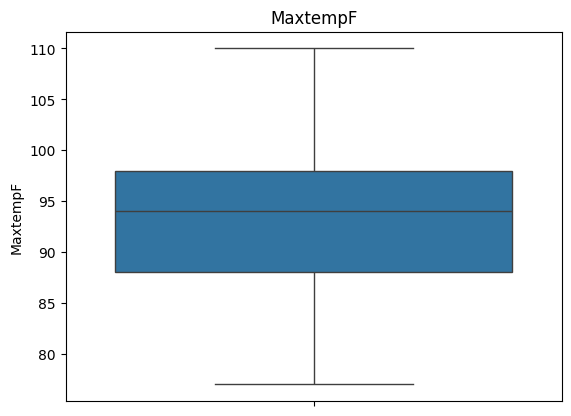

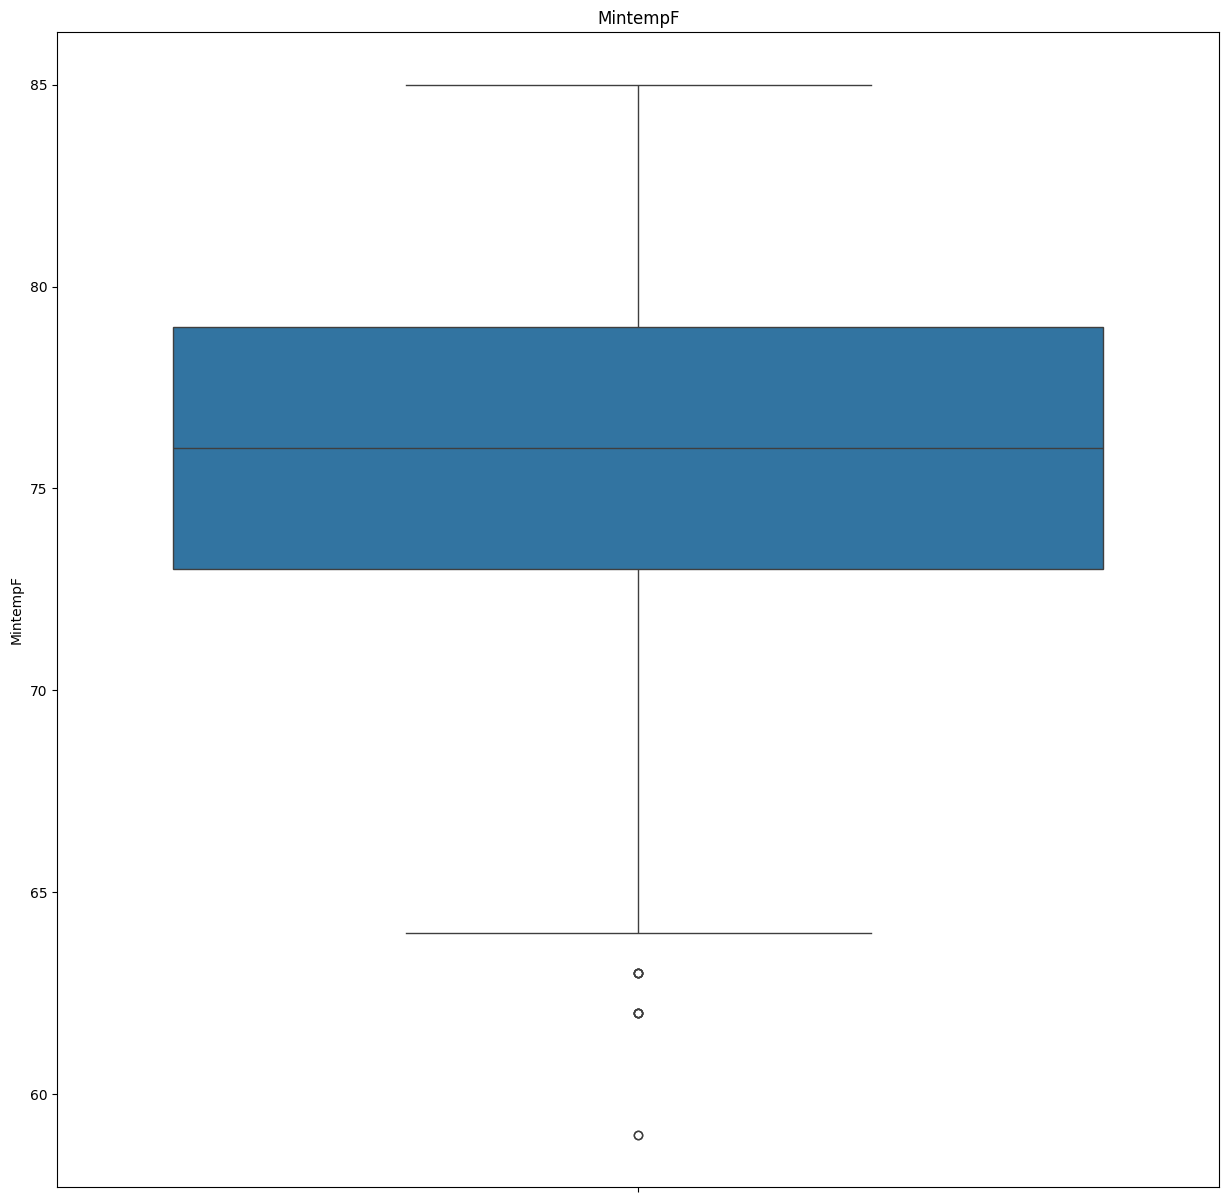

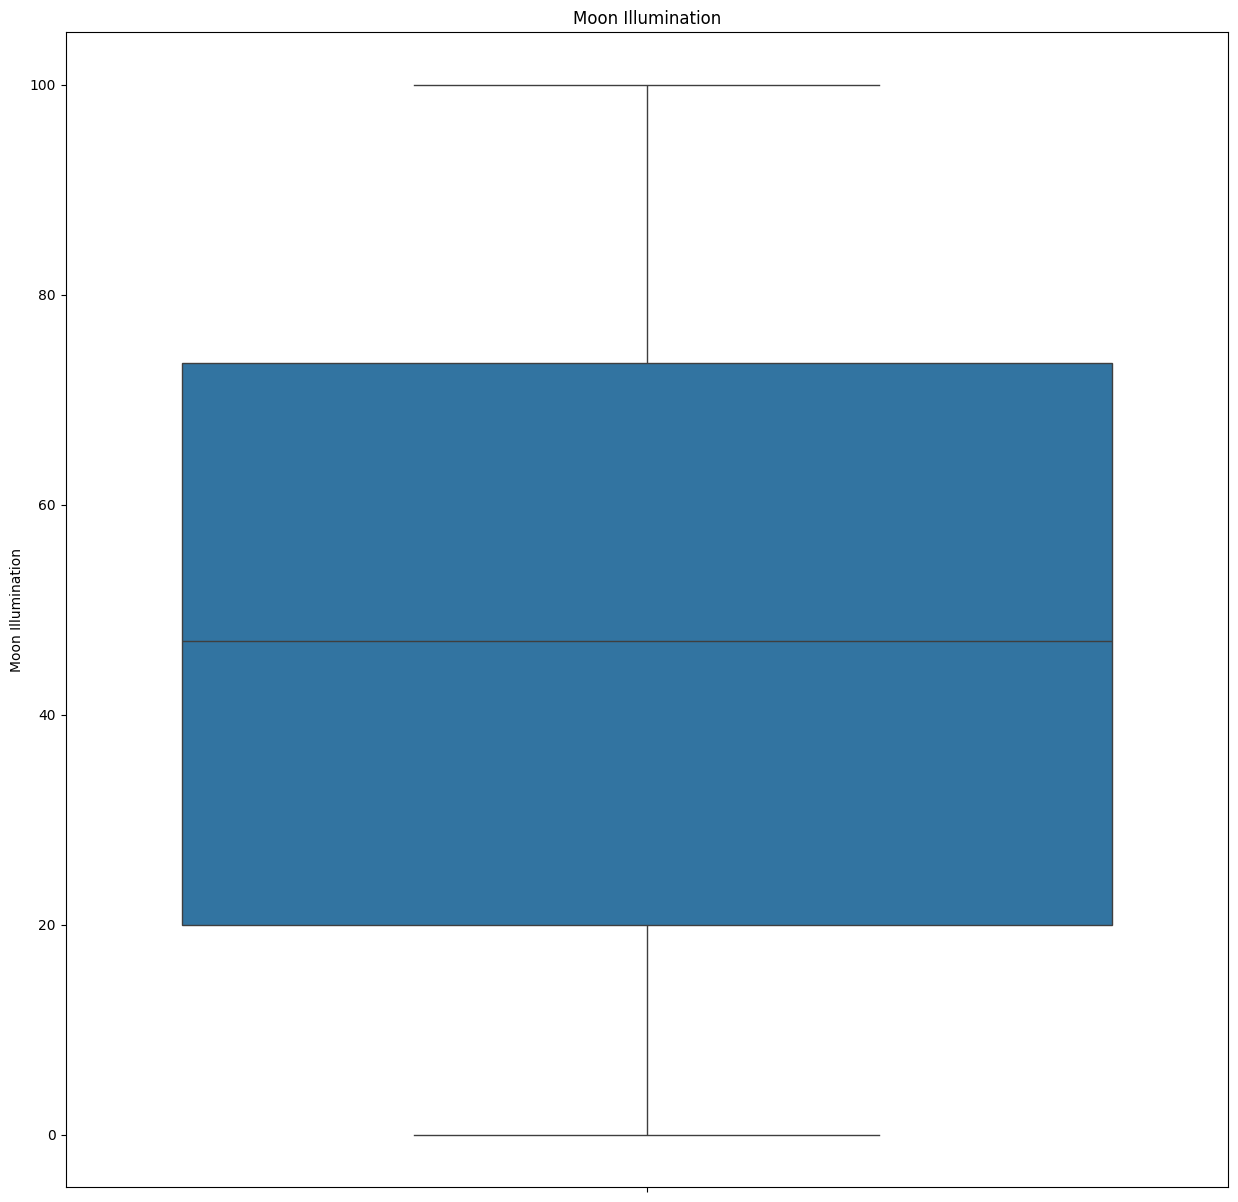

<Figure size 1500x1500 with 0 Axes>

In [8]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [9]:
for feature in continuous_feature:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_bridge = df[feature].quantile(0.25) - (IQR * 1.5)
    upper_bridge = df[feature].quantile(0.75) + (IQR * 1.5)
    print("Lower Bridge for", feature, "=", lower_bridge, " ", "Upper Bridge for", feature, "=", upper_bridge)

    df.loc[df[feature] >= upper_bridge, feature] = upper_bridge
    df.loc[df[feature] <= lower_bridge, feature] = lower_bridge

Lower Bridge for MaxtempF = 73.0   Upper Bridge for MaxtempF = 113.0
Lower Bridge for MintempF = 64.0   Upper Bridge for MintempF = 88.0
Lower Bridge for Moon Illumination = -60.25   Upper Bridge for Moon Illumination = 153.75


C:\Users\Hp\AppData\Local\Temp\ipykernel_4884\4190118329.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '153.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] >= upper_bridge, feature] = upper_bridge


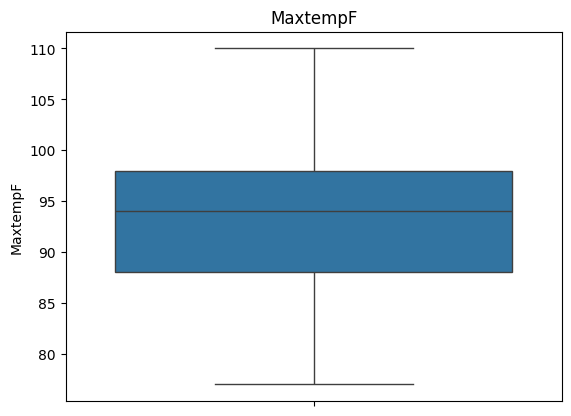

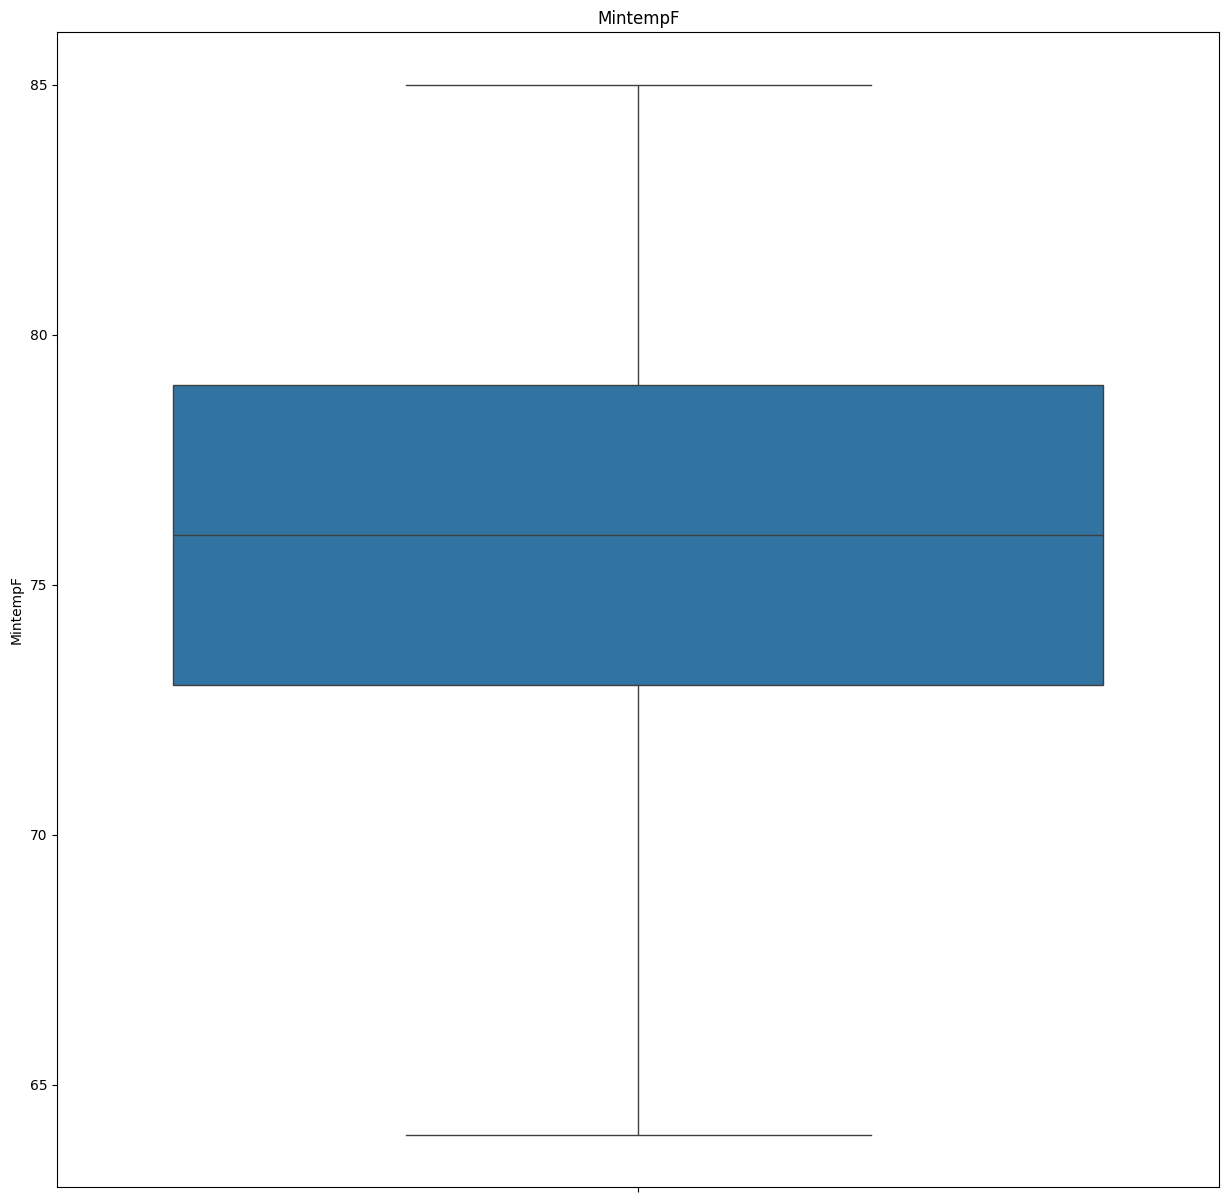

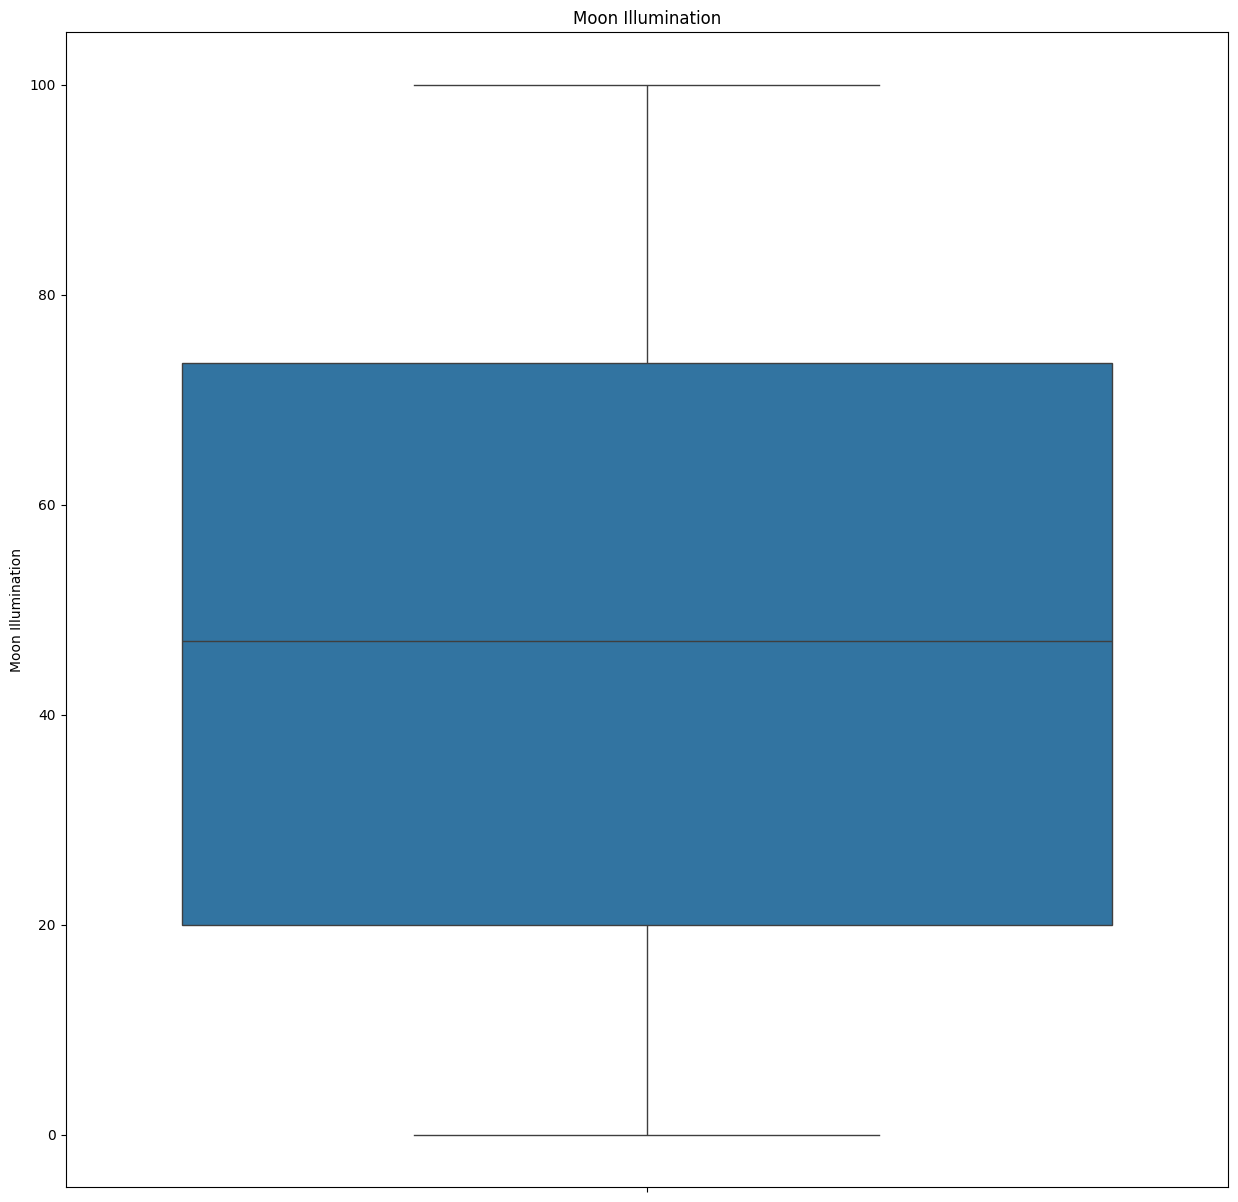

<Figure size 1500x1500 with 0 Axes>

In [10]:
#new boxplots
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [11]:
#cleaned data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MaxtempC,363.0,34.294766,3.910413,25.0,31.0,35.0,37.0,43.0
MaxtempF,363.0,93.680441,7.042282,77.0,88.0,94.0,98.0,110.0
MintempC,363.0,24.140496,2.885396,15.0,23.0,25.0,26.0,29.0
MintempF,363.0,75.490358,4.969719,64.0,73.0,76.0,79.0,85.0
Moon Phase,363.0,4.449036,2.451636,1.0,2.0,4.0,7.0,8.0
Moon Illumination,363.0,46.625344,31.332341,0.0,20.0,47.0,73.5,100.0
Date_Month,363.0,6.534435,3.460240,1.0,4.0,7.0,10.0,12.0


In [12]:
df.to_csv("preprocessed_a.csv", index=False)